In [1]:
# This is to rain and test the YOLOv8 algorithm on Face Mask Wearing dataset.
# Note: the notebooks was run on the "Python 3.10 - SDK V2" env. in Azure ML.

# He Zhang, Feb, 2023

In [2]:
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Torch: 1.13.1+cu117
Torchvision: 0.14.1+cu117
GPU: 4 Tesla M60


In [3]:
# go to folder YOLOv8
%cd yolov8/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-4-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov8


In [4]:
%%writefile ./mask149yolov8.yaml

# train & val & test sets
path: ../datasets/mask_wearing_dataset # dataset root dir
train: images/train # train images (relative to 'path'), 105 images
val: images/valid # val images (relative to 'path'), 29 images
test: images/test # test images (optional), 15 images

# classe information
nc: 2 # number of classes
names: ["mask", "no-mask"] # class names

Overwriting ./mask149yolov8.yaml


In [5]:
# train
model = YOLO("yolov8s.pt") 
results = model.train(data="mask149yolov8.yaml", imgsz=672, batch=10, 
                      project="runs/train/", name="exp_mask", epochs=100, cache=True)

100%|██████████| 21.5M/21.5M [00:04<00:00, 4.75MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=mask149yolov8.yaml, epochs=100, patience=50, batch=10, imgsz=672, save=True, cache=True, device=, workers=8, project=runs/train/, name=exp_mask, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

      7/100      5.12G      1.197     0.9464      1.128         52        672: 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]
                   all         29        162      0.689      0.773       0.77      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100      5.12G      1.157      1.078      1.147         44        672: 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                   all         29        162      0.647      0.831      0.805      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/100      5.12G      1.126     0.9992      1.106         51        672: 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]
           

     26/100      5.12G      1.013     0.6095      1.028         40        672: 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                   all         29        162      0.795      0.811      0.826       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/100      5.12G     0.9883     0.5664          1        151        672: 100%|██████████| 11/11 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                   all         29        162      0.869      0.768       0.83      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100      5.12G     0.9683     0.5371      1.022         74        672: 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]
           

     45/100      5.12G     0.8326     0.4801     0.9521         56        672: 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]
                   all         29        162      0.816      0.812      0.848      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/100      5.12G     0.8174     0.4798     0.9429         37        672: 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
                   all         29        162      0.783      0.804      0.834      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/100      5.12G     0.8757     0.5012     0.9609        153        672: 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]
           

     64/100      5.12G     0.7232     0.4152     0.9267         38        672: 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]
                   all         29        162      0.755      0.836      0.847      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     65/100      5.12G     0.7142      0.422     0.8922         61        672: 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                   all         29        162      0.793      0.854      0.882      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     66/100      5.12G     0.6896     0.4149     0.9113         25        672: 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]
           

     83/100      6.41G     0.6077     0.3649     0.8791         47        672: 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                   all         29        162      0.876      0.812      0.904       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     84/100      6.41G     0.6053     0.3576     0.8693         25        672: 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                   all         29        162      0.846      0.815      0.888      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     85/100      6.41G     0.6003     0.3531     0.8742         38        672: 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]
           

In [6]:
# evaluate
model = YOLO("runs/train/exp_mask/weights/best.pt")
results = model.val(project="runs/val/", name="exp_mask")

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-4-tesla-m60/code/Users/zhanghe/cv-safety-detection/datasets/mask_wearing_dataset/labels/valid.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]
                   all         29        162      0.966       0.78      0.906      0.613
                  mask         29        142      0.935      0.809      0.927      0.621
               no-mask         29         20      0.998       0.75      0.886      0.606
Speed: 0.4ms pre-process, 20.1ms inference, 0.0ms loss, 1.2ms post-process per image


In [9]:
# infer
model = YOLO("runs/train/exp_mask/weights/best.pt")
results = model.predict(source="../datasets/test_images/mask/", save=True, 
                        project="runs/detect/", name="exp_mask", save_txt=True, line_thickness=2)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/exp_mask
4 labels saved to runs/detect/exp_mask/labels


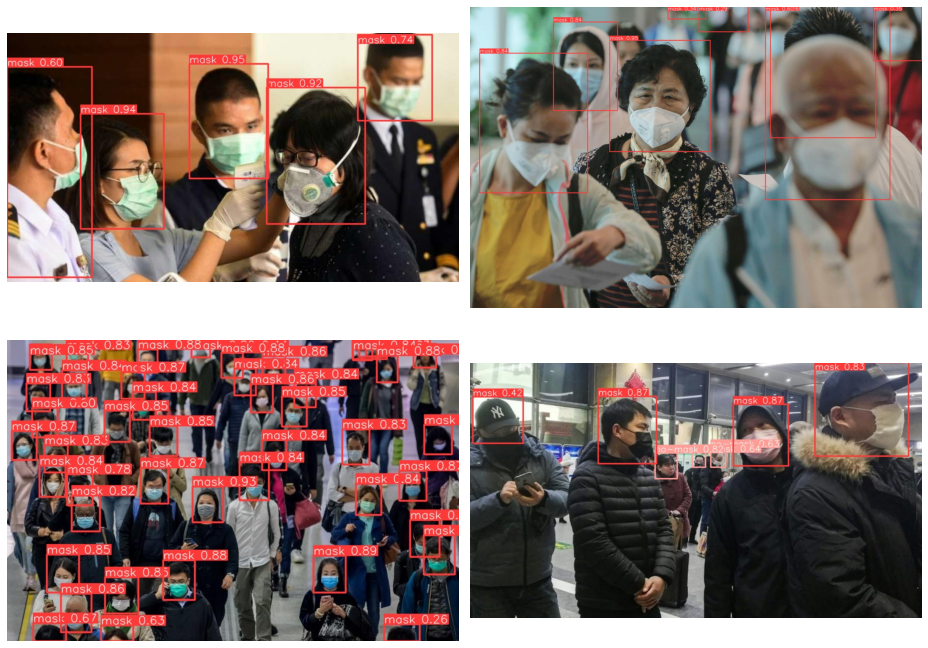

In [11]:
# visualize detection results
bbox_img1 = plt.imread("runs/detect/exp_mask/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg")
bbox_img2 = plt.imread("runs/detect/exp_mask/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg")
bbox_img3 = plt.imread("runs/detect/exp_mask/phplpE73q_jpg.rf.0ab5de066db2a3791b039388014565fe.jpg")
bbox_img4 = plt.imread("runs/detect/exp_mask/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.51ed69bf8d327d93b429a08581f6dea0.jpg")

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(bbox_img1)
plt.axis("off") 

plt.subplot(2, 2, 2)
plt.imshow(bbox_img2)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bbox_img3)
plt.axis("off") 

plt.subplot(2, 2, 4)
plt.imshow(bbox_img4)
plt.axis("off")

plt.tight_layout()
plt.show()